In [1]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import profile
import time

from profile import run
from itertools import permutations

%matplotlib inline

##### Nearest Neighbor Algorithm

In our first attempt at the nearest neighbor algorithm, we found that NN was able to provide us with an optimized solution for the traveling salesman problem in milliseconds for up to 100 cities (and < 1 second for 1000 cities), but didn't necessarily find the most optimal solution. In small subsets of cities, the solution found by Nearest Neighbors was often the optimal, but not as the number of cities are scaled up. The results also varied in their effectiveness when we re-ran the algorithm multiple times for one set of cities.

The primary reason for this is we selected a random city as our starting point for the NN algorithm. We masked the randomness slightly by setting a seed value in our algorithm. However, the fact remained that our algorithm's performance depended on the city it chose at random from a set.

In this implementation, we improve the NN algorithm by running the algorithm N times for a set of N cities - once with each city as the starting point. In this way, we run the stimulation from every starting point, but still limit the overall number of computations to N\*(N-1).

In order to measure the effectiveness of this approach, we'll need to re-implement the standard NN algorithm first.

In [2]:
def benchmark(func):
    _cache = dict()
    def inner(*args):
        try:
            return _cache[args][0]
        except:
            _cache[args] = func(*args), route_length(func(*args))
            return _cache[args][0]
    inner.__dict__ = func.__dict__
    inner.__name__ = func.__name__
    inner.__str__ = func.__str__
    inner.__doc__ = func.__doc__
    inner._cache = _cache
    return inner

In [3]:
def make_cities(n, max_height=600, max_width=400, seed=1000):
    """Returns list of n cities (points) within a *max_height* by *max_width* 
    grid."""
    random.seed(n * seed)
    return [complex(random.randrange(max_height), random.randrange(max_width))
            for i in range(n)]


def plot_route(route):
    """Given a route, plots the route end to end."""
    plot_lines(list(route) + [route[0]])
    
    
def plot_lines(points, style='gs-', display=True):
    """Given a set of points, plots the points."""
    plt.plot([X(p) for p in points], [Y(p) for p in points], style)
    plt.axis('scaled'); plt.axis('off')
    if display: print('Route distance:', route_length(points))
        
        
def X(point): return point.real


def Y(point): return point.imag


def distance(A, B):
    """Returns the distance between two points."""
    return abs(A - B)


def route_length(route):
    """Returns the total length of a route."""
    return sum(distance(route[i], route[i-1]) for i, n in enumerate(route))

@benchmark
def nearest_neighbor(n_cities, seed=1000):
    """Chooses a random point in a given set of cities, and chooses a route
    by incrementally choosing the closest city to each point."""
    cities = make_cities(n_cities, seed=seed)
    start = choose_random(cities)
    route = [start]
    cities.remove(start)
    
    for number_of_cities in range(len(cities)):
        closest = closest_city(route[-1], cities)
        route.append(closest)
        cities.remove(closest)
    
    return route


def choose_random(cities): return random.choice(cities)


def closest_city(city, cities): 
    """Returns the closest city in a set of cities."""
    return min(cities, key=lambda x: distance(x, city))

('Route distance:', 1480.8188030586537)
Wall time: 50 ms


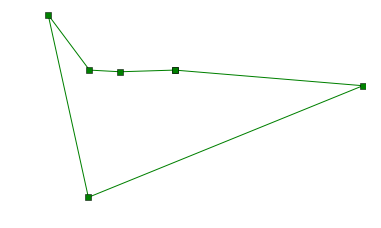

In [4]:
%time plot_route(nearest_neighbor(6))

You'll notice I also added a *benchmark* decorator to the nearest neighbor function. This will allow us to compare the performance of NN to our Better NN function, which we'll define later.

('Route distance:', 1200.2526165917152)
Wall time: 50 ms


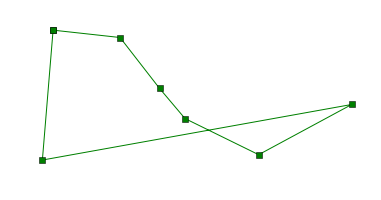

In [5]:
%time plot_route(nearest_neighbor(7))

('Route distance:', 1424.4682505736164)
Wall time: 66 ms


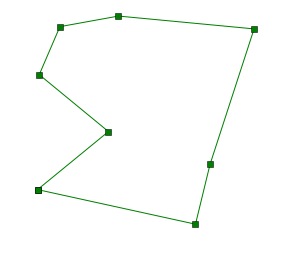

In [6]:
%time plot_route(nearest_neighbor(8))

('Route distance:', 1296.8202982138391)
Wall time: 63 ms


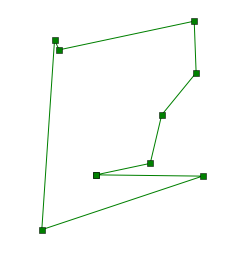

In [7]:
%time plot_route(nearest_neighbor(9))

('Route distance:', 2142.2618013013025)
Wall time: 74 ms


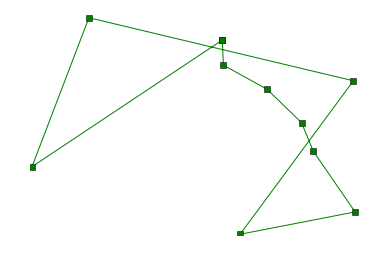

In [8]:
%time plot_route(nearest_neighbor(10))

('Route distance:', 2178.1052176774724)
Wall time: 61 ms


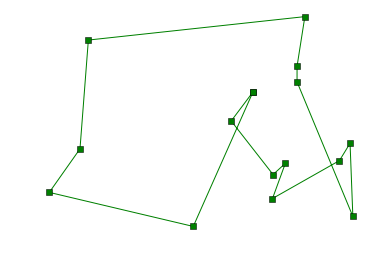

In [9]:
%time plot_route(nearest_neighbor(15))

('Route distance:', 2036.3081358412514)
Wall time: 100 ms


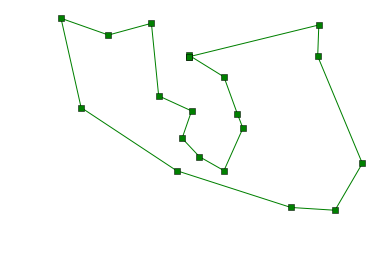

In [10]:
%time plot_route(nearest_neighbor(20))

('Route distance:', 2425.8539208384977)
Wall time: 63 ms


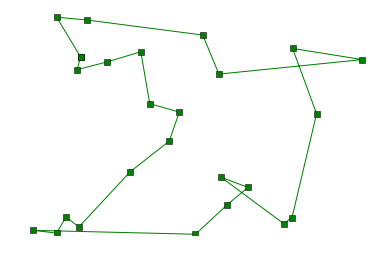

In [11]:
%time plot_route(nearest_neighbor(25))

In [12]:
{k[0]: v[1]
 for k, v in nearest_neighbor._cache.items()}

{6: 1480.8188030586539,
 7: 1200.2526165917152,
 8: 1424.4682505736164,
 9: 1296.8202982138391,
 10: 2142.261801301302,
 15: 2178.1052176774724,
 20: 2036.3081358412514,
 25: 2425.8539208384973}

Now that we have a baseline, let's build out Better Nearest Neighbor algorithm and see if we can do better.

In [13]:
@benchmark
def better_nn(n_cities, seed=1000):
    """Creates a set of *n* cities. Choose each city one by one and runs the
    nearest neighbor algorithm with that city as the start. In the end, returns
    the tour with the shortest *tour_length*."""
    cities = make_cities(n_cities, seed=seed)
    routes = [altered_nn(city, cities) for city in cities]
    
    return min(routes, key=route_length)
    
def altered_nn(city, cities):
    """Takes a start city and a list of cities, and returns a route implementing
    the NN algorithm"""
    cities = cities[::] # Make copy of cities
    start = city
    route = [start]
    cities.remove(start)
    
    for number_of_cities in range(len(cities)):
        closest = closest_city(route[-1], cities)
        route.append(closest)
        cities.remove(closest)
    
    return route

('Route distance:', 1480.8188030586539)
Wall time: 48 ms


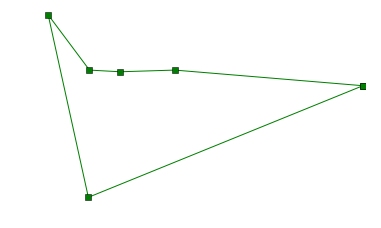

In [14]:
%time plot_route(better_nn(6))

('Route distance:', 1181.29943528004)
Wall time: 58 ms


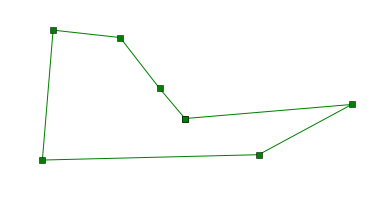

In [15]:
%time plot_route(better_nn(7))

('Route distance:', 1424.4682505736166)
Wall time: 63 ms


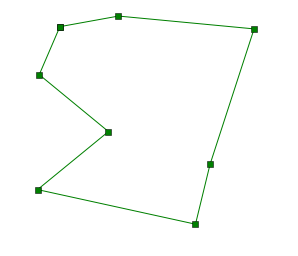

In [16]:
%time plot_route(better_nn(8))

('Route distance:', 1138.4327505783626)
Wall time: 71 ms


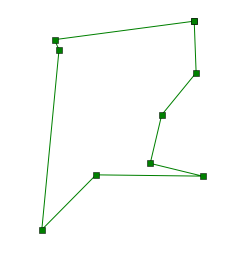

In [17]:
%time plot_route(better_nn(9))

('Route distance:', 1785.8113286295422)
Wall time: 69 ms


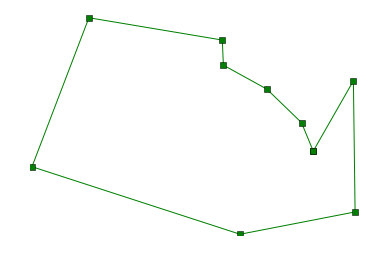

In [18]:
%time plot_route(better_nn(10))

('Route distance:', 1946.1664350124045)
Wall time: 171 ms


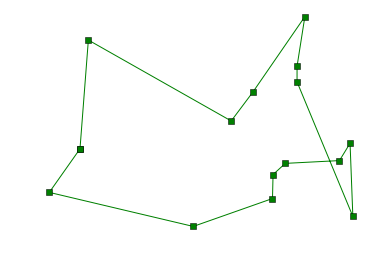

In [19]:
%time plot_route(better_nn(15))

('Route distance:', 1838.1910848159425)
Wall time: 168 ms


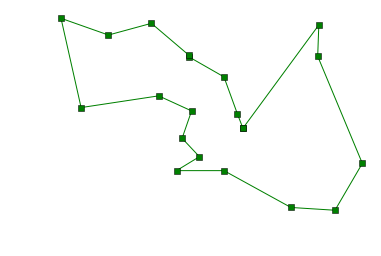

In [20]:
%time plot_route(better_nn(20))

('Route distance:', 2425.8539208384977)
Wall time: 108 ms


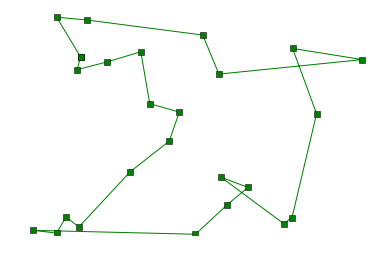

In [21]:
%time plot_route(better_nn(25))

Vizually, these definitely look more optimal. Let's compare the benchmarked results.

In [22]:
{k[0]: v[1]
 for k, v in nearest_neighbor._cache.items()}

{6: 1480.8188030586539,
 7: 1200.2526165917152,
 8: 1424.4682505736164,
 9: 1296.8202982138391,
 10: 2142.261801301302,
 15: 2178.1052176774724,
 20: 2036.3081358412514,
 25: 2425.8539208384973}

In [23]:
{k[0]: v[1]
 for k, v in better_nn._cache.items()}

{6: 1480.8188030586539,
 7: 1181.29943528004,
 8: 1424.4682505736164,
 9: 1138.4327505783629,
 10: 1785.8113286295422,
 15: 1946.1664350124047,
 20: 1838.1910848159425,
 25: 2425.8539208384973}

In [24]:
print('N: Improvement')
{k[0]: (nearest_neighbor._cache[k][1] - better_nn._cache[k][1])/nearest_neighbor._cache[k][1]
 for k in nearest_neighbor._cache.keys()}

N: Improvement


{6: 0.0,
 7: 0.015790993537256753,
 8: 0.0,
 9: 0.12213530884242757,
 10: 0.1663897813307582,
 15: 0.10648649146177866,
 20: 0.09729227494514804,
 25: 0.0}

Definitely some improvements between our original NN approach and the improved algorithm! A few things to stand out to me, however:

1. It's not intuitively clear why we might gain an improvement in performance by changing our starting position
2. There are still cases where the standard NN algorithm had no worst performance than our improved approach. We would expect this to happen in some small percentage of cases (1/N), but this occurred in 3 of our 8 trials. Were we just really lucky in our first approach or is this something we should look into?

Let's start with the first point. In order to get a better grasp on *why* our improved NN algorithm performs better, let's alter our plotting function slightly.

In [25]:
def labeled_plot(route):
    """Given a route, plots the route end to end."""
#     plot_lines([route[0]], 'rs')
    for i, city in enumerate(route):
        plt.text(X(city), Y(city), '  {}'.format(str(i)))
    plot_lines(list(route)+[route[0]])

('Route distance:', 1181.29943528004)


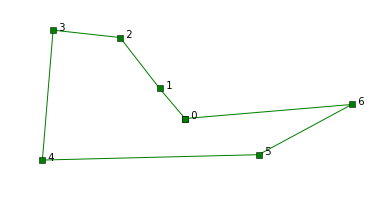

In [26]:
labeled_plot(better_nn(7))

('Route distance:', 1200.2526165917152)


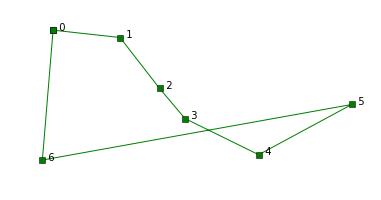

In [27]:
labeled_plot(nearest_neighbor(7))

Looking at the starting point of these two plots, it's much easier to see why the former outperformed the latter. Both start with a single point, and move through the route point by point by selecting the next closest city. The original NN algorithm, however, starts at the left-hand corner of the map, whereas the improved algorithm starts at the center.

As for the second point, let's re-run the analysis with a different seed value (to "refresh" the randomness of our point selection) and see if we come up with more intuitive results.

In [28]:
nearest_neighbor._cache.clear()
better_nn._cache.clear()

for i in range(2, 26):
    nearest_neighbor(i, 400)
    better_nn(i, 400)

In [29]:
print('N: Improvement')
{k[0]: (nearest_neighbor._cache[k][1] - better_nn._cache[k][1])/nearest_neighbor._cache[k][1]
 for k in nearest_neighbor._cache.keys()}

N: Improvement


{2: 0.0,
 3: 0.0,
 4: 0.05180412413194134,
 5: 0.0,
 6: 0.0,
 7: 0.0019225277618408548,
 8: 0.2012218642652183,
 9: 1.5157379606362702e-16,
 10: 0.20120564912371747,
 11: 0.00596102483472418,
 12: 0.06386800568265975,
 13: 0.006090733885616819,
 14: 0.11330691624814518,
 15: 0.22377347742591625,
 16: 0.018099990135902837,
 17: 0.01591829889799415,
 18: 0.025832479644886802,
 19: 0.2052381398609735,
 20: 0.16757269136216776,
 21: 0.09803695518649608,
 22: 0.1031668951807593,
 23: 0.10856590028927526,
 24: 0.06857364810058013,
 25: 0.1590540019410282}

It looks like in the vast majority of cases the better_nn algorithm performed better than the original algorith, as we would intuitively assume.

###### How can we improve?

Even running our NN algorithm once for every city in a set, we were still able to compute a solution in fractions of a secon. As a next step, we could program the algorithm to re-run NN but this time search through two-city starting points, rather than just iterating through each city individually. This would of course add more computation time to our problem, but would likely result in better solutions.

In order to limit the number of times we run the algorithm, we could add logic to throw away starting points that are obviously not going to result in optimal solutions - maybe based on what the distance between the first two points we select. 

We could also run two separate branches of the nearest neighbor algorithm on a set of cities to come up with two optimal half-routes, and connect the two halves. This is essentially a <a href="https://en.wikipedia.org/wiki/Travelling_salesman_problem#Iterative_improvement">k-opt</a> solution with k=2. For large sets of cities, we can take larger k's.